<a href="https://colab.research.google.com/github/Aldo05art/UTS-DataMining/blob/main/2318046_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib inline


In [ ]:
from google.colab import files
print("Upload covid19_indonesia_cleaned.csv (or your cleaned file).")
uploaded = files.upload()
file_path = next(iter(uploaded))


Upload covid19_indonesia_cleaned.csv (or your cleaned file).


Saving covid19_indonesia_cleaned.csv to covid19_indonesia_cleaned.csv


In [ ]:
df = pd.read_csv(file_path, parse_dates=['date'])

In [ ]:
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)

print("\nBasic info:")
display(df.info())

Columns: ['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths', 'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths', 'total_recovered', 'total_active_cases', 'location_level', 'city_or_regency', 'province', 'country', 'continent', 'island', 'time_zone', 'special_status', 'total_regencies', 'total_cities', 'total_districts', 'total_urban_villages', 'total_rural_villages', 'area_(km2)', 'population', 'population_density', 'longitude', 'latitude', 'new_cases_per_million', 'total_cases_per_million', 'new_deaths_per_million', 'total_deaths_per_million', 'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate', 'growth_factor_of_new_cases', 'growth_factor_of_new_deaths', 'new_cases_was_missing_or_negative', 'total_cases_recalc', 'flag_missing_cases', 'flag_negative_new', 'flag_spike', 'flag_total_mismatch']

Data types:


,0
date,datetime64[ns]
location_iso_code,object
location,object
new_cases,int64
new_deaths,int64
new_recovered,int64
new_active_cases,int64
total_cases,int64
total_deaths,int64
total_recovered,int64



Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               31822 non-null  datetime64[ns]
 1   location_iso_code                  31822 non-null  object        
 2   location                           31822 non-null  object        
 3   new_cases                          31822 non-null  int64         
 4   new_deaths                         31822 non-null  int64         
 5   new_recovered                      31822 non-null  int64         
 6   new_active_cases                   31822 non-null  int64         
 7   total_cases                        31822 non-null  int64         
 8   total_deaths                       31822 non-null  int64         
 9   total_recovered                    31822 non-null  int64         
 10  total_active_cases   

None

In [ ]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Shape:", df.shape)
display(df.head())

Shape: (31822, 44)


,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,...,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths,new_cases_was_missing_or_negative,total_cases_recalc,flag_missing_cases,flag_negative_new,flag_spike,flag_total_mismatch
0,2020-03-26,ID-AC,Aceh,1,0,0,1,1,0,1,...,0.00%,100.00%,NaN,NaN,False,1,False,False,False,False
1,2020-03-27,ID-AC,Aceh,3,0,0,3,4,0,1,...,0.00%,25.00%,3.00,1.0,False,4,False,False,False,False
2,2020-03-28,ID-AC,Aceh,1,0,0,1,5,0,1,...,0.00%,20.00%,0.33,1.0,False,5,False,False,False,False
3,2020-03-29,ID-AC,Aceh,0,0,0,0,5,0,1,...,0.00%,20.00%,0.00,1.0,False,5,False,False,False,False
4,2020-03-30,ID-AC,Aceh,0,0,0,0,5,0,1,...,0.00%,20.00%,1.00,1.0,False,5,False,False,False,False


1. Pemekrisaan cepat & metadata

In [ ]:
n_locations = df['location'].nunique()
date_min, date_max = df['date'].min(), df['date'].max()
print(f"\nUnique locations: {n_locations}")
print(f"Date range: {date_min.date()} to {date_max.date()}")


Unique locations: 35
Date range: 2020-03-01 to 2022-09-16


In [ ]:
display(df['location'].value_counts().head())

,count
location,
DKI Jakarta,929
Indonesia,929
Riau,928
Jawa Barat,927
Banten,924


In [ ]:
nation = df.groupby('date', as_index=False).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'new_recovered': 'sum',
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_recovered': 'sum'
}).sort_values('date')


2. Statistik deskriptif (agregat nasional)

In [ ]:
display(nation[['new_cases','new_deaths','new_recovered']].describe().round(2))

,new_cases,new_deaths,new_recovered
count,930.00,930.00,930.00
mean,13765.97,339.46,13358.35
std,22002.00,622.94,20212.83
min,0.00,0.00,0.00
25%,1440.25,33.00,1257.00
50%,7082.50,158.50,7158.00
75%,12751.75,339.00,13371.75
max,129436.00,4140.00,119588.00


3. Nilai yang hilang & duplikat (pemeriksaan akhir)

In [ ]:
# 3. Missing and duplicates final check
print("Missing per column (national DF):")
display(df.isnull().sum())

print("Exact duplicate rows:", df.duplicated().sum())
print("Duplicate (location,date) pairs:", df.duplicated(subset=['location','date']).sum())

Missing per column (national DF):


,0
date,0
location_iso_code,0
location,0
new_cases,0
new_deaths,0
new_recovered,0
new_active_cases,0
total_cases,0
total_deaths,0
total_recovered,0


Exact duplicate rows: 0
Duplicate (location,date) pairs: 0


4. Distribusi & outlier (histogram + boxplot)

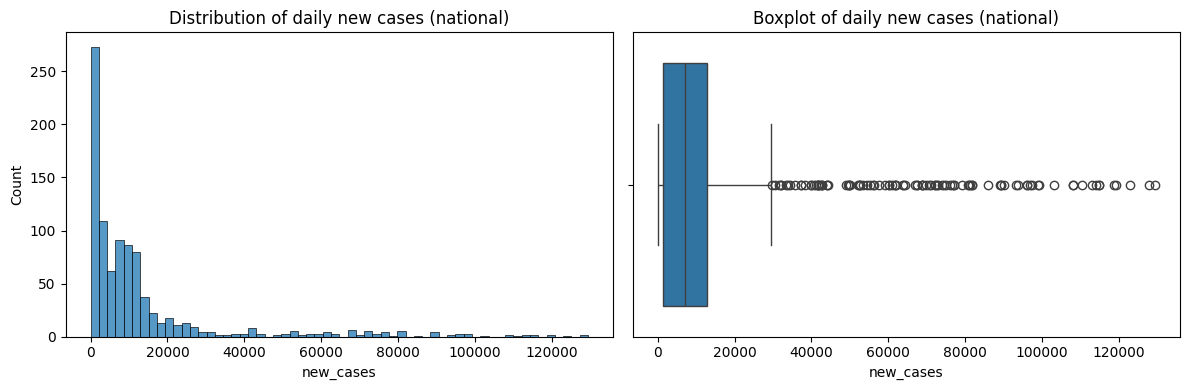

In [ ]:
# 4. Distribution national new_cases
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(nation['new_cases'], bins=60, kde=False)
plt.title('Distribution of daily new cases (national)')

plt.subplot(1,2,2)
sns.boxplot(x=nation['new_cases'])
plt.title('Boxplot of daily new cases (national)')
plt.tight_layout()
plt.show()

5. Ikhtisar deret waktu: rata-rata harian & rata-rata bergerak

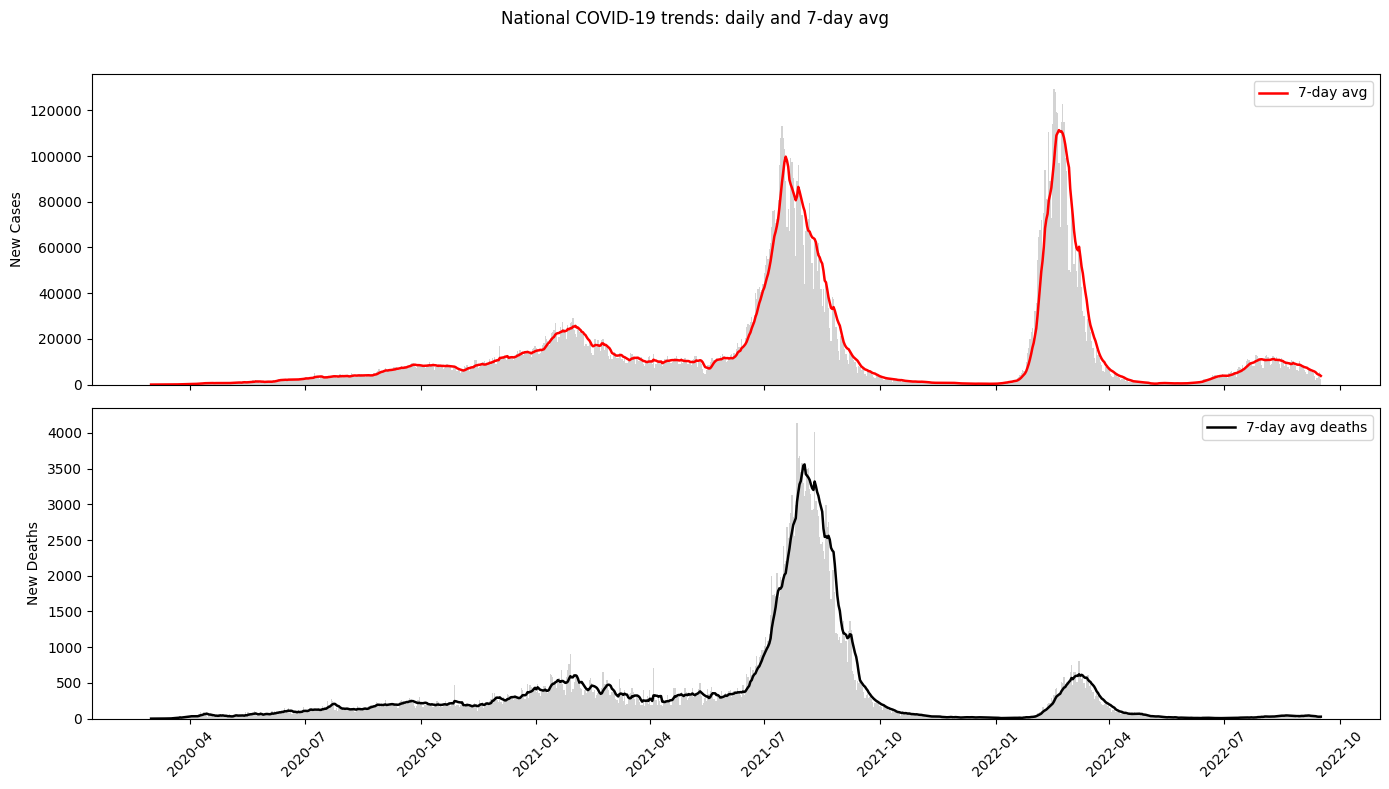

In [ ]:
# 5. Rolling averages and plot national trends
nation['new_cases_7d'] = nation['new_cases'].rolling(7, min_periods=1).mean()
nation['new_deaths_7d'] = nation['new_deaths'].rolling(7, min_periods=1).mean()

fig, ax = plt.subplots(2,1, figsize=(14,8), sharex=True)
ax[0].bar(nation['date'], nation['new_cases'], color='lightgray', width=1)
ax[0].plot(nation['date'], nation['new_cases_7d'], color='red', linewidth=1.8, label='7-day avg')
ax[0].set_ylabel('New Cases')
ax[0].legend()

ax[1].bar(nation['date'], nation['new_deaths'], color='lightgray', width=1)
ax[1].plot(nation['date'], nation['new_deaths_7d'], color='black', linewidth=1.8, label='7-day avg deaths')
ax[1].set_ylabel('New Deaths')
ax[1].legend()

ax[1].xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.suptitle('National COVID-19 trends: daily and 7-day avg')
plt.tight_layout(rect=[0,0,1,0.96])
plt.savefig("eda_national_trends.png", dpi=150)
plt.show()


6. Tren kematian dengan kesembuhan

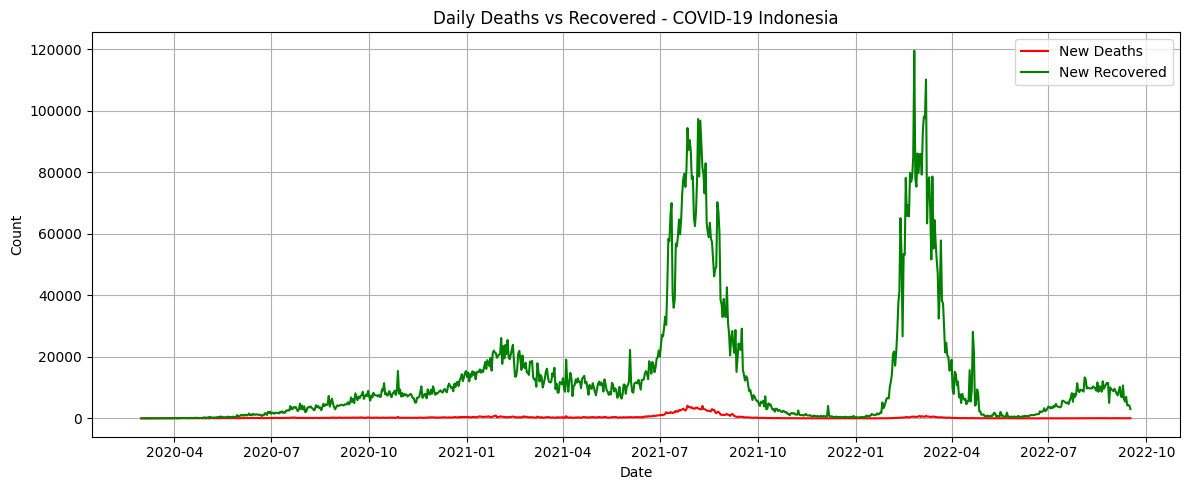

In [ ]:
nation = df.groupby('date', as_index=False).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'new_recovered': 'sum',
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_recovered': 'sum'
}).sort_values('date')
plt.figure(figsize=(12,5))
plt.plot(nation['date'], nation['new_deaths'], color='red', label='New Deaths')
plt.plot(nation['date'], nation['new_recovered'], color='green', label='New Recovered')
plt.title('Daily Deaths vs Recovered - COVID-19 Indonesia')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

7. Musiman / dekomposisi (nasional & provinsi sampel)

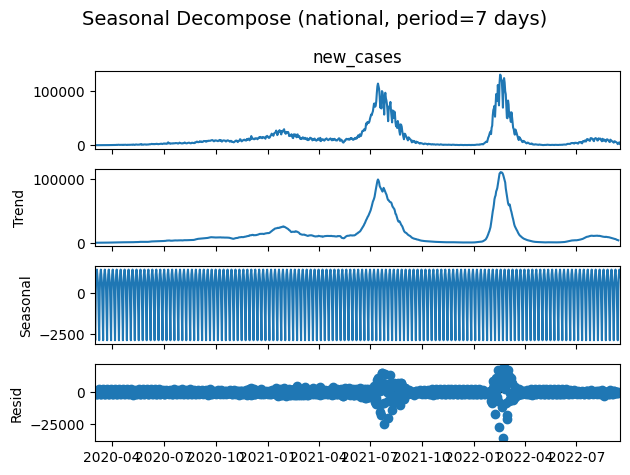

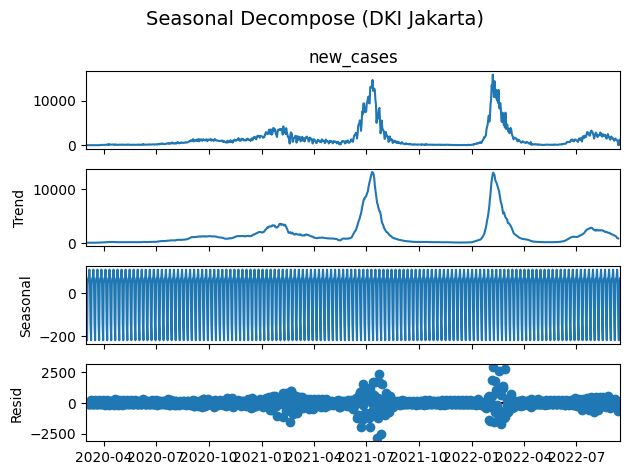

In [ ]:
# 6. Seasonal decomposition (statsmodels)
!pip install statsmodels --quiet
from statsmodels.tsa.seasonal import seasonal_decompose

# Use new_cases national series (ensure no missing dates)
nation_ts = nation.set_index('date')['new_cases'].asfreq('D').fillna(0)
res = seasonal_decompose(nation_ts, model='additive', period=7)  # weekly period
res.plot().suptitle('Seasonal Decompose (national, period=7 days)', fontsize=14)
plt.tight_layout()
plt.savefig("seasonal_decompose_national.png", dpi=150)
plt.show()

# Sample province decomposition (choose a province with sufficient data)
sample_prov = df['location'].value_counts().index[0]
prov_ts = df[df['location']==sample_prov].set_index('date')['new_cases'].asfreq('D').fillna(0)
res_p = seasonal_decompose(prov_ts, model='additive', period=7)
res_p.plot().suptitle(f'Seasonal Decompose ({sample_prov})', fontsize=14)
plt.tight_layout()
plt.show()


8. Tingkat pertumbuhan & perubahan mingguan

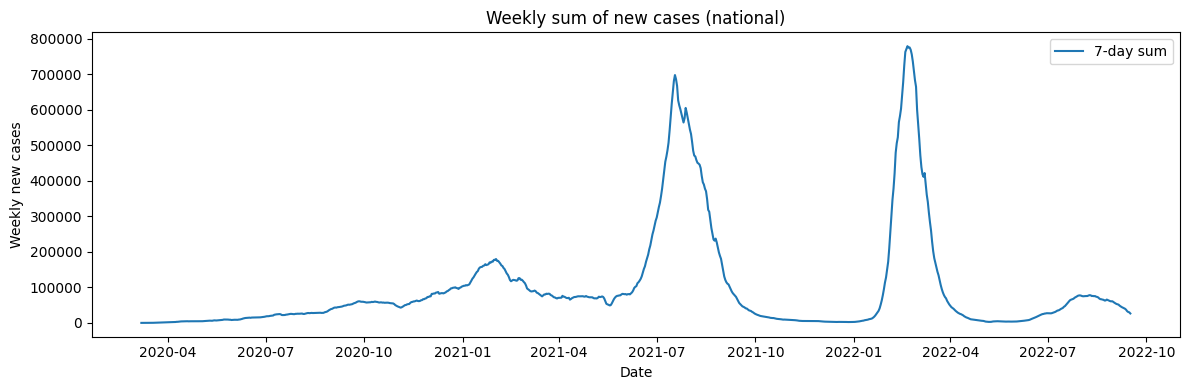

,date,new_cases,new_cases_pctchg
920,2022-09-07,7026,-0.026
921,2022-09-08,6276,-0.107
922,2022-09-09,5608,-0.106
923,2022-09-10,5218,-0.070
924,2022-09-11,3878,-0.257
925,2022-09-12,1995,-0.486
926,2022-09-13,3087,0.547
927,2022-09-14,4699,0.522
928,2022-09-15,5293,0.126
929,2022-09-16,2358,-0.555


In [ ]:
# 7. Growth rates (daily percent change) and weekly sums
nation['new_cases_pctchg'] = nation['new_cases'].pct_change().replace([np.inf,-np.inf], np.nan)
nation['new_cases_weekly_sum'] = nation['new_cases'].rolling(7).sum()

# Plot weekly sum (smoother trend)
plt.figure(figsize=(12,4))
plt.plot(nation['date'], nation['new_cases_weekly_sum'], label='7-day sum')
plt.title('Weekly sum of new cases (national)')
plt.xlabel('Date'); plt.ylabel('Weekly new cases')
plt.legend(); plt.tight_layout()
plt.show()

# Show recent growth summary
display(nation[['date','new_cases','new_cases_pctchg']].tail(10).round(3))


9. Korelasi (angka nasional)

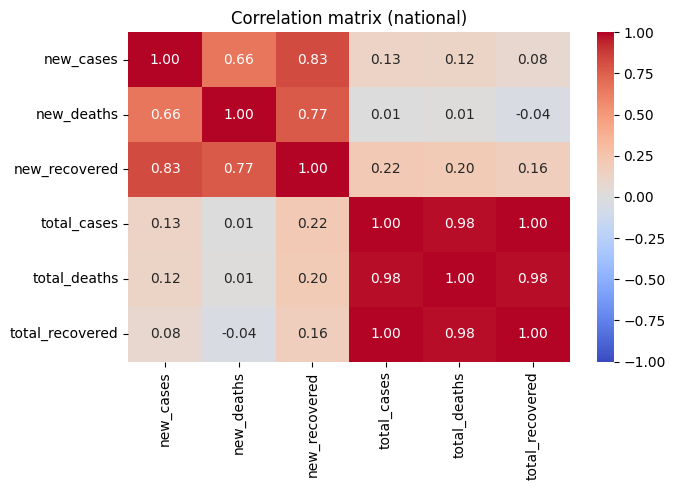

In [ ]:
# 8. Correlation heatmap on national aggregated columns
corr_cols = ['new_cases','new_deaths','new_recovered','total_cases','total_deaths','total_recovered']
corr = nation[corr_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (national)')
plt.tight_layout()
plt.savefig("corr_national.png", dpi=150)
plt.show()


10. Ringkasan dan peringkat per provinsi

,location,total_cases,total_deaths,total_recovered
0,Indonesia,6405044,157876,6218708


/tmp/ipython-input-779346336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='total_cases', y='location', palette='Reds_r')


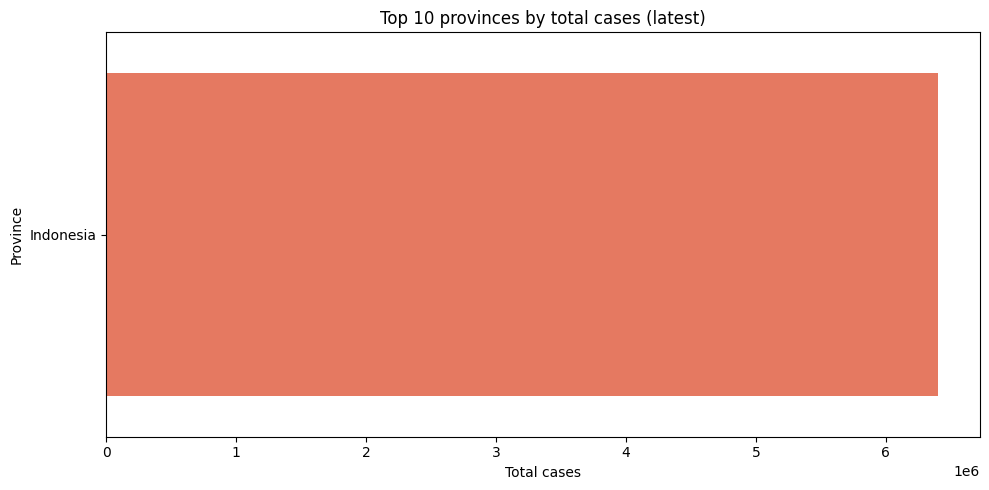

In [ ]:
# 9. Per-province cumulative summary (latest day)
latest_date = df['date'].max()
latest_df = df[df['date']==latest_date]
prov_summary = latest_df.groupby('location', as_index=False).agg({
    'total_cases':'sum',
    'total_deaths':'sum',
    'total_recovered':'sum'
}).sort_values('total_cases', ascending=False)

display(prov_summary.head(10))

# Plot top 10 provinces by total cases
top10 = prov_summary.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='total_cases', y='location', palette='Reds_r')
plt.title('Top 10 provinces by total cases (latest)')
plt.xlabel('Total cases'); plt.ylabel('Province')
plt.tight_layout()
plt.savefig("top10_provinces_totalcases.png", dpi=150)
plt.show()


11.clustering berdasarkan metrics seperti total_cases per capita, death rate, recent growth

,location,total_cases,total_deaths,last14_sum,population,cases_per_100k,cluster
0,Aceh,44038,2223,125,5247257,839.257540,0
1,Bali,166831,4731,505,4216171,3956.931538,0
2,Banten,333875,2950,3640,10722374,3113.816026,0
3,Bengkulu,29173,522,33,1999539,1458.986296,0
5,Daerah Istimewa Yogyakarta,224307,5928,359,3631015,6177.528873,0


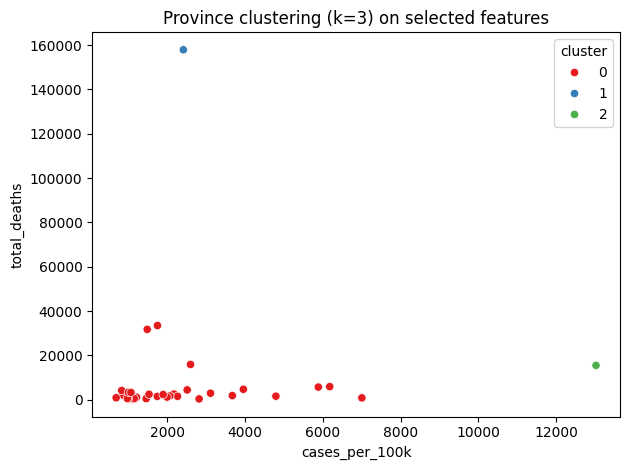

In [ ]:
# 10. Clustering quick: construct features per province
# ensure population column exists or skip per-capita metric
features = df.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'new_cases': lambda s: s.tail(14).sum()  # last 14-days sum
}).rename(columns={'new_cases':'last14_sum'}).reset_index()

# If population exists, compute per-capita
if 'population' in df.columns:
    pop = df.groupby('location')['population'].last().reset_index()
    features = features.merge(pop, on='location', how='left')
    features['cases_per_100k'] = features['total_cases'] / features['population'] * 100000
    feat_cols = ['cases_per_100k','total_deaths','last14_sum']
else:
    feat_cols = ['total_cases','total_deaths','last14_sum']

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = features[feat_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
features['cluster'] = kmeans.labels_

display(features.sort_values('cluster').head())
sns.scatterplot(data=features, x=feat_cols[0], y=feat_cols[1], hue='cluster', palette='Set1')
plt.title('Province clustering (k=3) on selected features')
plt.tight_layout()
plt.show()


12. Menyimpan file yang sudah di Exploratory Data Analysis (EDA) ke dalam komputer

In [ ]:
from google.colab import files

nation[['date','new_cases','new_cases_7d']].to_csv('nation_summary_daily.csv', index=False)
prov_summary.to_csv('province_summary_latest.csv', index=False)

# Download ke komputer
files.download('nation_summary_daily.csv')
files.download('province_summary_latest.csv')


KeyError: "['new_cases_7d'] not in index"